<a href="https://colab.research.google.com/github/julianavelasquezg/Business-Intelligence/blob/main/Parcial_1_Juliana_Vel%C3%A1squez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Reto Parcial 1**

De acuerdo con la base de datos NDA_Data del Capitulo 13 del Libro Guía (Analítica de Negocios – Comunicación con Datos - Jaggia), implementar tres modelos que permitan determinar si el número de juegos jugados por jugador de la NBA esta por encima del promedio (games_played). Para la implementación de los modelos, se deben tener en cuenta las siguientes recomendaciones:

* Las variables de entrada para la construcción del modelo son las siguientes: Salary, Age, Height, Weight, games_started, minutes_per_game, assits, blocks, steals.
* Para aplicar la línea de código XDB.dropna(), es necesario primero seleccionar las variables de entrada y de salida.
* Determinar cual de los modelos tuvo un mejor comportamiento frente al pronóstico de la variable games_played (por encima (1) – por debajo (0) del promedio de la variable. )
* Para la construcción del árbol, es necesario considerar solo 4 niveles, mientras que para el modelo de Clusterización, es importante tener en cuenta 5 grupos de datos.
* Para la obtención de la gráfica de los clusters, es importante tener en cuenta las variables que tienen una mayor correlación con respecto a la variable de salida, para luego mostrar las gráficas de correlación.
* Determinar la categoría a la que pertenece una persona con las siguientes características mediante la utilización del modelo Naive Bayes y Clustering: [5000000,37,82,245,45,17.8,0.5,1.4,0.4]
* De acuerdo con la estructura del árbol de decisión, determinar la regla que cumple el deportista y cual es la probabilidad de pertenencia.

**Descripción de las variables de entrada y salida**

**Variables de entrada**
* Salary (Salario): Ingreso anual del jugador en dólares. Es una variable clave que puede influir en el rendimiento y el tiempo de juego.
* Age (Edad): Edad del jugador en años. Puede afectar el desempeño y la cantidad de juegos jugados.
* Height (Estatura): Altura del jugador en metros o centímetros. Suele influir en el desempeño en diferentes posiciones dentro del juego.
* Weight (Peso): Peso del jugador en kilogramos o libras. Puede estar relacionado con la resistencia y el tipo de juego que desempeña.
* Games Started (Juegos Iniciados): Cantidad de partidos en los que el jugador comenzó como titular.
* Minutes per Game (Minutos por Partido): Promedio de minutos jugados por el jugador en cada partido.
* Assists (Asistencias): Número promedio de pases que resultan en un punto anotado por un compañero de equipo.
* Blocks (Bloqueos): Promedio de tiros bloqueados por partido, indicador de habilidades defensivas.
* Steals (Robos): Promedio de balones robados por partido, reflejo de la capacidad defensiva del jugador.

**Variable de salida**
* Games Played Above Avg (Juegos Jugados por Encima del Promedio): Variable de salida que indica si un jugador jugó más partidos que el promedio de la liga (1 = Sí, 0 = No).

0. Cargamos las librerías

In [ ]:
import numpy as np #Posee funciones matemáticas
import pandas as pd #Comunicación con el excel
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from google.colab import drive
drive.mount('/content/drive')

import seaborn as sns
from sklearn.cluster import KMeans
import sklearn.metrics as sm


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**1. Organizamos la base de datos con la que vamos a trabajar**

In [ ]:
nxl = '/content/drive/MyDrive/4. BD2_NBA_Data_M_Int.xlsx'
XDB = pd.read_excel(nxl, sheet_name=0)

# Incluimos en el dataframe las columnas con los datos que usaremos (entrada y salida)
XDB = XDB[['salary','age','height','weight','games_started','minutes_per_game','assists','blocks','steals', 'games_played']]

# Creamos la nueva columna 'games_played_above_avg' en el DataFrame original (XDB)
XDB['games_played_above_avg'] = (XDB['games_played'] > XDB['games_played'].mean()).astype(int)

# Eliminamos la columna 'games_played' de XDB
XDB = XDB.drop('games_played', axis=1) # axis=1 specifies that we are dropping a column

# Variables de entrada del dataframe
XD = XDB[['salary','age','height','weight','games_started','minutes_per_game','assists','blocks','steals']]

# Variable de salida del dataframe
YD = XDB['games_played_above_avg']

# Eliminamos las filas con valores faltantes
XD = XD.dropna()
YD = YD.dropna()
XDB = XDB.dropna()
display(XDB)

len(np.where(YD==1)[0])/len(XD)

0.42696629213483145

# **NAIVE BAYES**

**2. Comenzamos con la implementación del primer modelo**


In [ ]:
from sklearn.naive_bayes import GaussianNB

mnb = GaussianNB()
mnb.fit(XD, YD) # Ajustar el entrenamiento a la nueva variable de salida

#Obtenemos la información del modelo
u=mnb.theta_ #La media de las variables de entrada
print("La media de las variables de entrada es:\n",u)
var=mnb.var_ # Se calculan las varianzas (qué tan alejados estan los datos de la media)
print("La varianza de las variables de entrada es:\n",var)
sigma=np.sqrt(var) #Se calcula la desviación estándar
print("La desviación estándar de las variables de entrada es:\n",sigma)

#Se determinan los limites superiores e inferiores de las variables de entrada
LS=u+sigma
LI=u-sigma
print("El límite superior de las variables de entrada es:\n",LS)
print("El límite inferior de las variables de entrada es:\n",LI)

La media de las variables de entrada es:
 [[2.91582743e+06 2.41607843e+01 7.91647059e+01 2.19423529e+02
  6.52352941e+01 1.82878431e+01 1.46941176e+00 3.88627451e-01
  5.98431373e-01]
 [7.42986398e+06 3.04684211e+01 7.92684211e+01 2.24731579e+02
  4.09294737e+02 2.66994737e+01 2.51473684e+00 5.62105263e-01
  8.41578947e-01]]
La varianza de las variables de entrada es:
 [[1.15798849e+13 2.73523678e+04 2.73566841e+04 2.80171672e+04
  3.39158480e+04 2.74045416e+04 2.73465659e+04 2.73449991e+04
  2.73449589e+04]
 [3.68265886e+13 2.73570701e+04 2.73564280e+04 2.80246595e+04
  1.10096418e+05 2.73810055e+04 2.73484892e+04 2.73450417e+04
  2.73449657e+04]]
La desviación estándar de las variables de entrada es:
 [[3.40292300e+06 1.65385513e+02 1.65398561e+02 1.67383294e+02
  1.84162559e+02 1.65543171e+02 1.65367971e+02 1.65363234e+02
  1.65363112e+02]
 [6.06849146e+06 1.65399728e+02 1.65397787e+02 1.67405674e+02
  3.31807803e+02 1.65472069e+02 1.65373786e+02 1.65363363e+02
  1.65363133e+02]]
El

**3. Evaluamos el caso de un jugador**

In [ ]:
#Evaluamos un jugador
XDS=[[5000000,37,82,245,45,17.8,0.5,1.4,0.4]]

YDP = mnb.predict(XDS)
print("La predicción del jugador es:\n", YDP)

if YDP == 1:
  print("El jugador está por encima del promedio")

if YDP == 0:
  print("El jugador está por debajo del promedio")

La predicción del jugador es:
 [0]
El jugador está por debajo del promedio


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


**4. Evaluamos el desempeño del modelo Naive Bayes**

In [ ]:
from sklearn.metrics import confusion_matrix

# Realizamos predicciones sobre los datos de entrenamiento
YDP2 = mnb.predict(XD)

# Creamos la matriz de confusión
cm = confusion_matrix(YD, YDP2)
print("La matriz de Confusión para el modelo naive bayes:\n", cm)

# Extraer valores de la matriz de confusión
VN = cm[0, 0]  # Verdaderos Negativos
FP = cm[0, 1]  # Falsos Positivos
VP = cm[1, 1]  # Verdaderos Positivos
FN = cm[1, 0]  # Falsos Negativos

# Calculamos las métricas de rendimiento
Ex = (VP + VN) / (VP + VN + FP + FN)  # Exactitud (Accuracy)
print("Exactitud:", Ex)

TE = (FN + FP) / (VP + VN + FP + FN)  # Tasa de Error (Error Rate)
print("Tasa de Error:", TE)

Se = VP / (VP + FN)  # Sensibilidad (Recall)
print("Sensibilidad:", Se)

Sp = VN / (VN + FP)  # Especificidad (Specificity)
print("Especificidad:", Sp)

Pr = VP / (VP + FP)  # Precisión (Precision)
print("Precisión:", Pr)

PrNeg = VN / (VN + FN)  # Valor Predictivo Negativo (Negative Predictive Value)
print("Valor Predictivo Negativo:", PrNeg)


La matriz de Confusión para el modelo naive bayes:
 [[236  19]
 [ 76 114]]
Exactitud: 0.7865168539325843
Tasa de Error: 0.21348314606741572
Sensibilidad: 0.6
Especificidad: 0.9254901960784314
Precisión: 0.8571428571428571
Valor Predictivo Negativo: 0.7564102564102564


**Análisis de los resultados:**
El modelo Naive Bayes aplicado en este caso para predecir si un jugador ha jugado más partidos que el promedio tuvo una exactitud del 78.65%, lo que indica un desempeño aceptable en la clasificación de jugadores según la cantidad de partidos jugados. Su sensibilidad del 60% muestra que tiene dificultades para identificar correctamente a los jugadores que han jugado más partidos que el promedio. Sin embargo, su especificidad del 92.54% indica que clasifica con gran precisión a los jugadores que han jugado menos partidos que el promedio.

La precisión del 85.71% sugiere que cuando el modelo predice que un jugador ha jugado más partidos que el promedio, suele acertar en la mayoría de los casos. Sin embargo, la tasa de error del 21.34% revela que aún existe un margen de mejora, especialmente en la detección de jugadores con mayor cantidad de juegos disputados.

# **ÁRBOLES DE DECISIÓN**

**5. Comenzamos con la implementación del segundo modelo**

In [ ]:
mar=DecisionTreeClassifier(criterion='gini', max_depth=4)
mar.fit(XD,YD)

#Se procede con la gráfica
from pydotplus import graph_from_dot_data #Me crea la gráfica
from sklearn.tree import export_graphviz #Me exporta a PNG, JPEG,TIFF

ve=['salary','age','height','weight','games_started','minutes_per_game','assists','blocks','steals'] #Nombres para el árbol
dot_data=export_graphviz(mar,feature_names=ve,filled=True, rounded=True)
graph=graph_from_dot_data(dot_data)
graph.write_png('4.Parcial1_ArbolDecision.png')

True

In [ ]:
nodos_puros = sum(mar.tree_.impurity == 0.0)
print(f"Número de nodos puros en el árbol: {nodos_puros}")

Número de nodos puros en el árbol: 6


In [ ]:
# Cargar la base de datos para pronosticar
XDB0 = pd.read_excel(nxl, sheet_name=0)
XDB0.head(100)

# Crear la columna 'games_played_above_avg' en XDB0
if 'games_played_above_avg' not in XDB0.columns:
  XDB0['games_played_above_avg'] = (XDB0['games_played'] > XDB0['games_played'].mean()).astype(int)

# Crear la base de datos a pronosticar
XD0 = XDB0[['salary','age','height','weight','games_started','minutes_per_game','assists','blocks','steals']]
YD0 = XDB0[['games_played_above_avg']]

# Instead of looking for NaN values, select rows where 'games_played_above_avg' is not available (presumably 0)
#filas = np.where(np.isnan(YD0))[0]
filas = np.where(YD0['games_played_above_avg'] == 0)[0]  # Assuming 0 represents 'not available'

XD0 = np.array(XD0)
XD0 = XD0[filas]

# Calcular la predicción para los jugadores seleccionados
y_pred = mar.predict(XD0)

# Crear el informe en Excel
df = pd.DataFrame(np.column_stack((filas, XD0, y_pred)))
df.columns = ['player', 'salary','age','height','weight','games_started','minutes_per_game','assists','blocks','steals', 'games_played_above_avg']  # Adaptar nombres de columnas
df.to_excel("Evaluación Jugadores.xlsx")

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


**7. Evaluamos el comportamiento del modelo**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import _tree

def get_rule(tree, feature_names, class_names, node_index=0):
  """
  Returns the decision rule for a given node in the decision tree.

  Args:
    tree: The trained decision tree model.
    feature_names: List of feature names used in the model.
    class_names: List of class names (e.g., ['below average', 'above average']).
    node_index: The index of the node to get the rule for.

  Returns:
    A string representing the decision rule for the node.
  """
  tree_ = tree.tree_
  feature_id = tree_.feature[node_index]

  if feature_id != _tree.TREE_UNDEFINED:
    # Check if feature_id is within the bounds of feature_names
    if feature_id < len(feature_names):  # This is the added check
        name = feature_names[feature_id]
        threshold = tree_.threshold[node_index]
        rule = f"{name} <= {threshold:.2f}"

        left_rule = get_rule(tree, feature_names, class_names, tree_.children_left[node_index])
        right_rule = get_rule(tree, feature_names, class_names, tree_.children_right[node_index])

        if left_rule and right_rule:
            rule = f"if {rule} then ({left_rule}) else ({right_rule})"
        elif left_rule:
            rule = f"if {rule} then ({left_rule})"
        elif right_rule:
            rule = f"if not {rule} then ({right_rule})"

        return rule
    else:
        # Handle the case where feature_id is out of bounds
        return "Feature index out of bounds"  # Or any other appropriate handling
  else:
    # Leaf node
    class_probs = tree_.value[node_index][0]
    class_index = np.argmax(class_probs)
    class_name = class_names[class_index]
    prob = class_probs[class_index] / np.sum(class_probs)
    return f"{class_name} (probability: {prob:.2f})"

# Get feature names before calling get_rule
feature_names = XD.columns.tolist()  # Use XD.columns.tolist() to get feature names
class_names = ['below average', 'above average']
rule = get_rule(mar, feature_names, class_names)
print(f"Decision Rule: {rule}")

# To predict for a specific athlete (using XDn from your previous example):
athlete_data = [5000000, 37, 82, 245, 45, 17.8, 0.5, 1.4, 0.4]
prediction = mar.predict([athlete_data])[0]
probability = mar.predict_proba([athlete_data])[0][prediction]

print(f"Athlete Prediction: {class_names[prediction]}")
print(f"Probability: {probability:.2f}")

Decision Rule: if age <= 26.50 then (if games_started <= 320.00 then (if salary <= 6888459.50 then (if weight <= 276.50 then (below average (probability: 0.99)) else (below average (probability: 0.67))) else (if assists <= 1.35 then (above average (probability: 1.00)) else (below average (probability: 0.95)))) else (if minutes_per_game <= 27.70 then (below average (probability: 1.00)) else (if minutes_per_game <= 36.25 then (above average (probability: 1.00)) else (below average (probability: 1.00))))) else (if games_started <= 84.00 then (if games_started <= 38.00 then (if age <= 31.50 then (below average (probability: 1.00)) else (below average (probability: 0.50))) else (if assists <= 0.65 then (above average (probability: 0.83)) else (below average (probability: 0.65)))) else (if games_started <= 269.50 then (if steals <= 0.95 then (above average (probability: 0.88)) else (below average (probability: 0.83))) else (if games_started <= 324.50 then (above average (probability: 0.92)) 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
YDP=mar.predict(XD) #Pronóstico sobre la base de datos original

cm=confusion_matrix(YD, YDP)
print("La matriz de confusión para el modelo de árboles de decisión es:\n", cm)
VN=cm[0,0];FP=cm[0,1];FN=cm[1,0]; VP=cm[1,1]
Exactitud=(VP+VN)/(VP+VN+FP+FN)
Sensibilidad=VP/(VP+FN)
Especificidad=VN/(VN+FP)
Precision=VP/(VP+FP)
TasaError=(FP+FN)/(VP+VN+FP+FN)



print("La Exactitud es:", Exactitud)
print("La Sensibilidad es:", Sensibilidad)
print("La Especificidad es:", Especificidad)
print("La Precisión es:", Precision)
print("La Tasa de Error es:", TasaError)



La matriz de confusión para el modelo de árboles de decisión es:
 [[247   8]
 [ 12 178]]
La Exactitud es: 0.9550561797752809
La Sensibilidad es: 0.9368421052631579
La Especificidad es: 0.9686274509803922
La Precisión es: 0.956989247311828
La Tasa de Error es: 0.0449438202247191


**Análisis de los resultados:**

El modelo de Árbol de Decisión, entrenado con una profundidad de 4 niveles, mostró un desempeño muy bueno con una exactitud del 95.5%, lo que indica una alta capacidad de clasificación. Su sensibilidad del 93.68% demuestra que identifica correctamente a la mayoría de los jugadores con más partidos jugados que el promedio. Además, su especificidad del 96.86% indica que también es muy efectivo en la clasificación de jugadores con menos juegos jugados. La precisión del 95.69% significa que, cuando el modelo predice que un jugador ha jugado más partidos de lo normal, casi siempre está en lo correcto. Finalmente, con una tasa de error de solo 4.49%, este modelo es el más fiable entre los evaluados.

# **CLUSTERIZACION KMEANS**

**7. Comenzamos con la implementación del tercer modelo**

In [ ]:
XD = XDB[['salary','age','height','weight','games_started','minutes_per_game','assists','blocks','steals','games_played_above_avg']]
display(XD)


,salary,age,height,weight,games_started,minutes_per_game,assists,blocks,steals,games_played_above_avg
0,947276,36,79,260,838,32.4,2.7,0.5,1.8,1
1,25000000,37,78,212,1198,36.1,4.7,0.5,1.4,1
2,4088019,39,78,220,954,32.4,3.4,0.6,1.1,1
3,5675000,36,77,195,432,30.9,3.6,0.2,1.0,1
4,5250000,40,83,250,1389,34.0,3.0,2.2,0.7,1
...,...,...,...,...,...,...,...,...,...,...
440,1733040,19,78,202,6,14.3,0.6,0.2,0.4,0
441,1140240,21,83,200,4,15.1,0.4,0.5,1.2,0
442,1131960,20,81,220,0,4.2,0.0,0.0,0.0,0
443,3102240,20,77,200,66,30.4,5.5,0.5,1.0,0


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1000x1000 with 0 Axes>

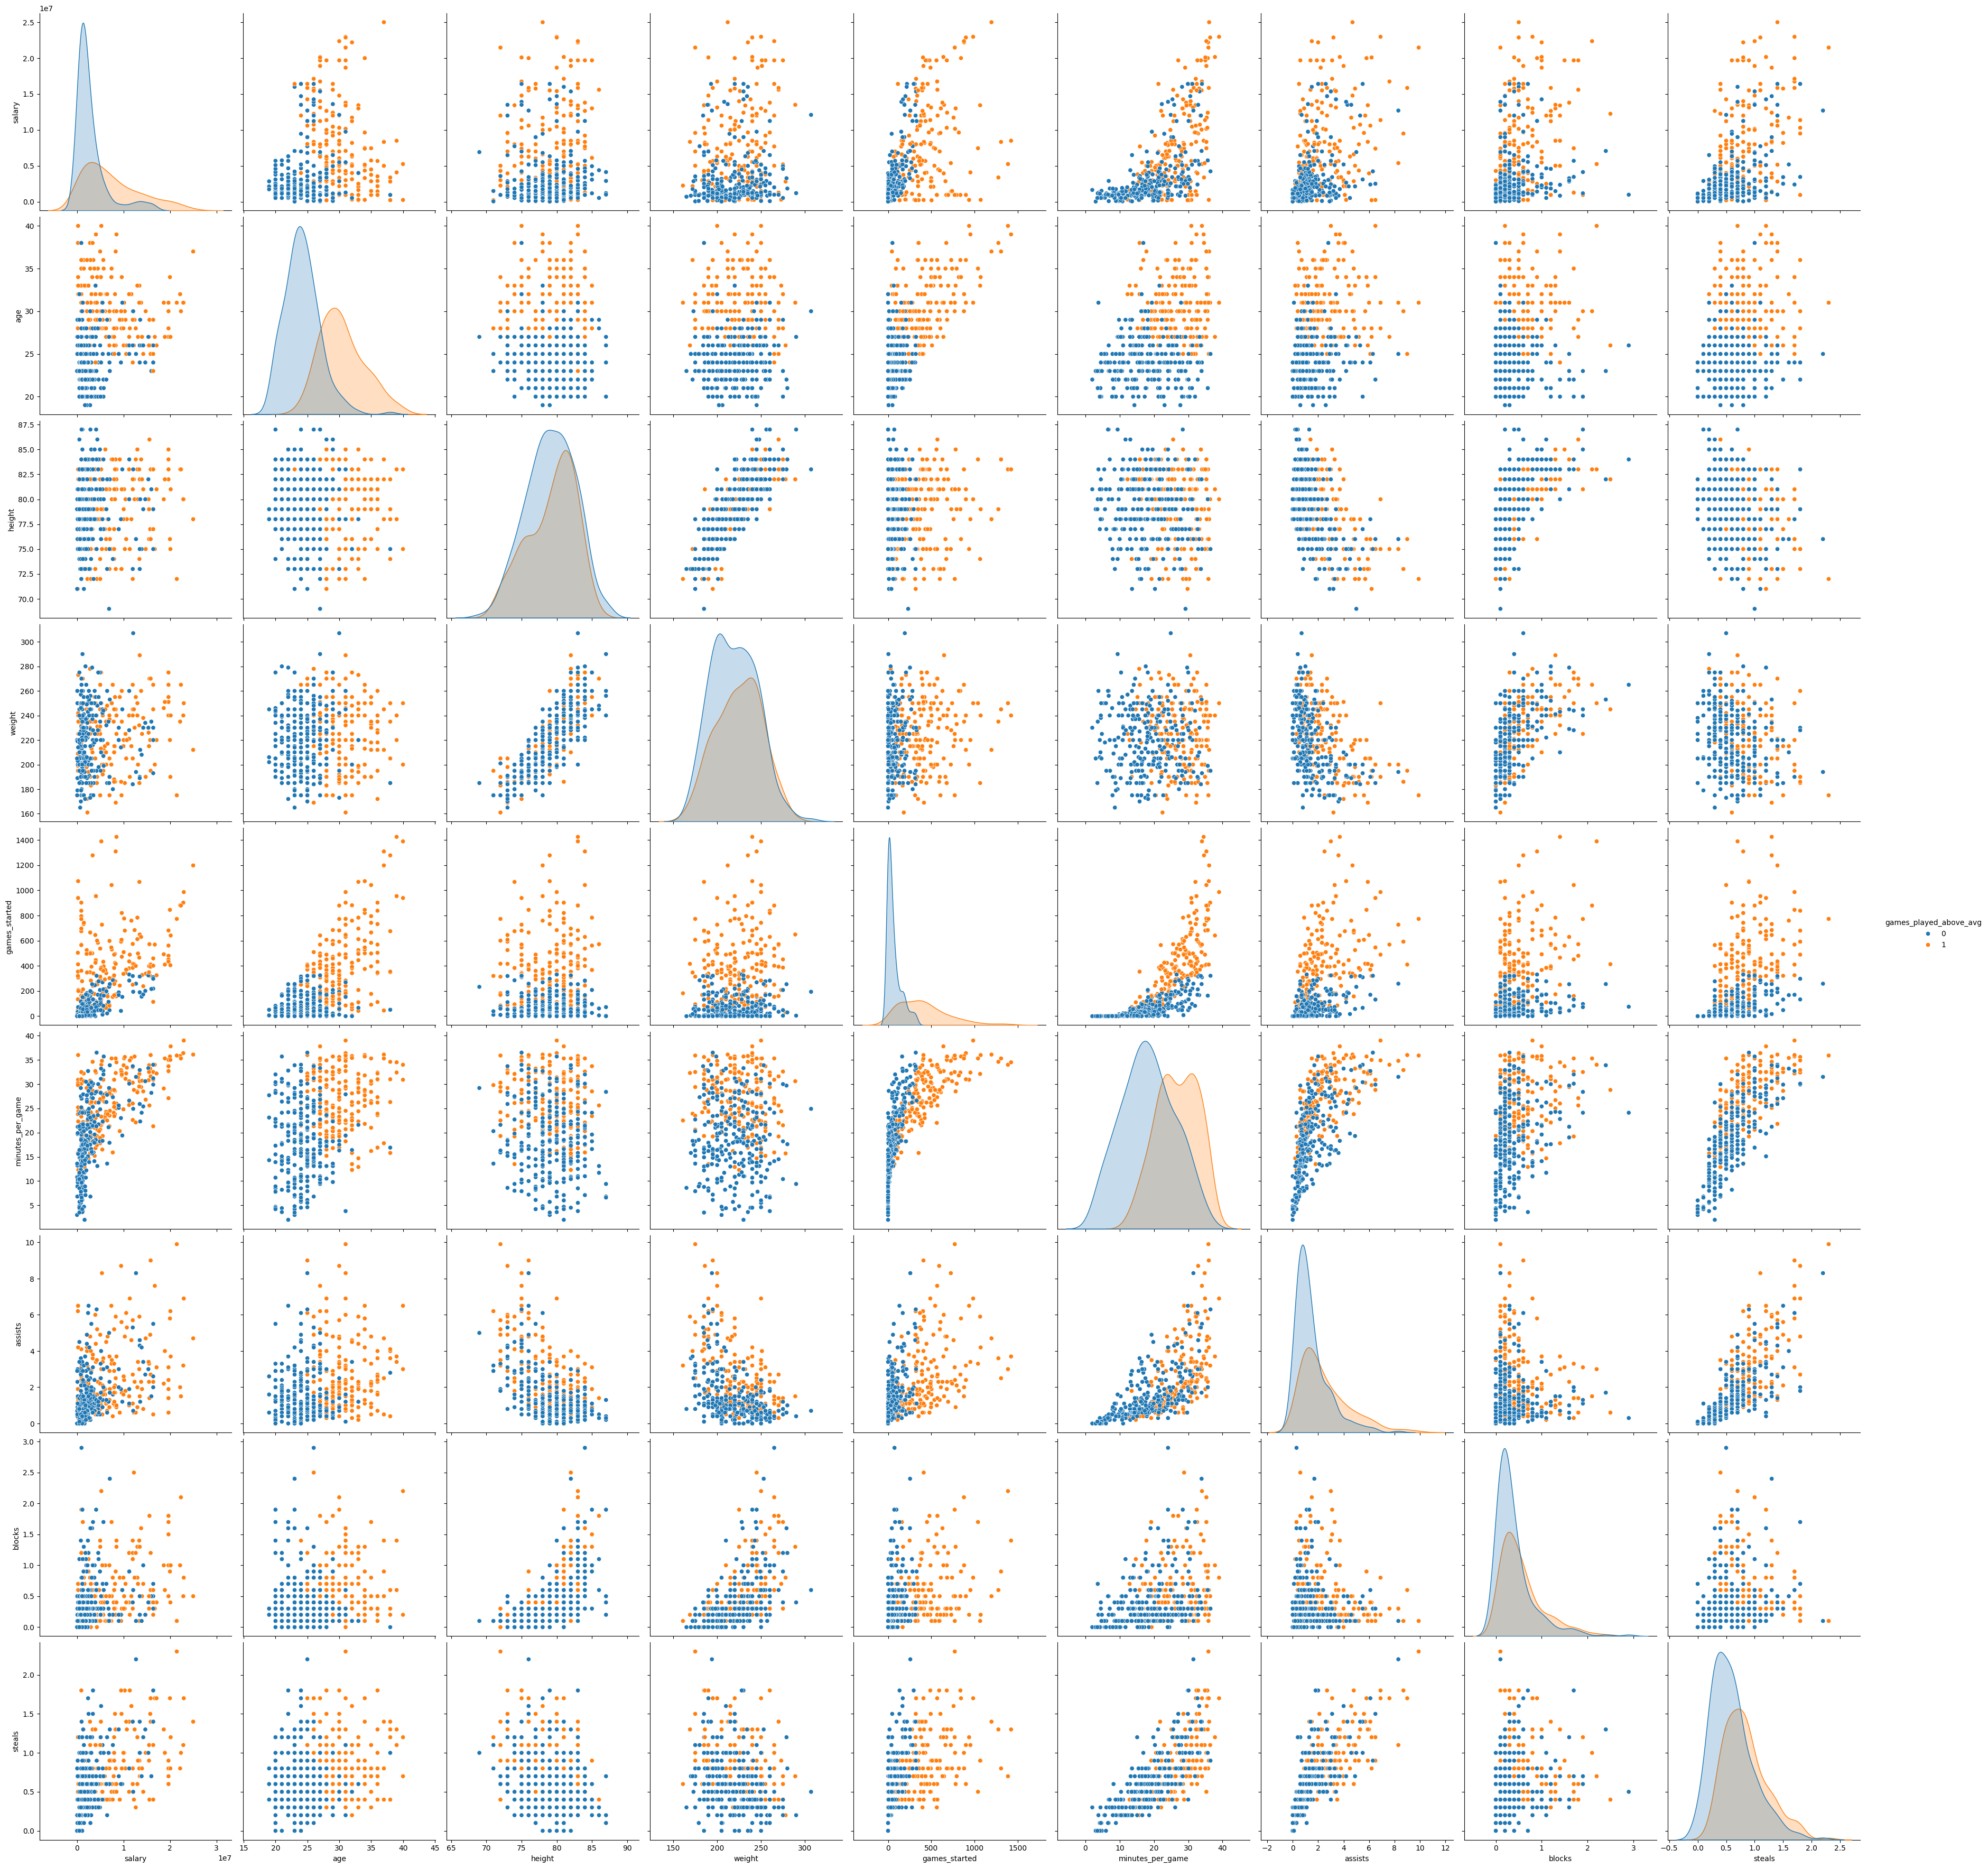

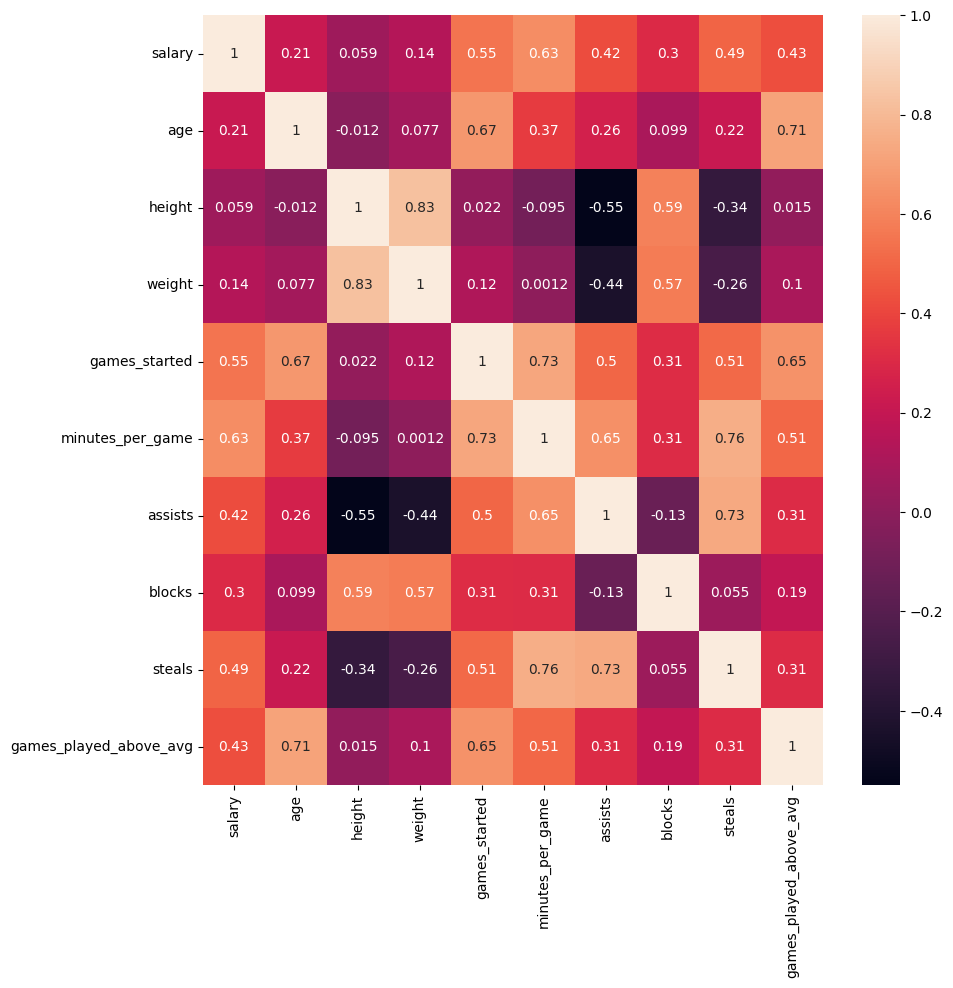

In [ ]:
#Para mirar correlaciones y variables importantes
plt.figure(figsize=(10,10))
sns.pairplot(XDB, hue='games_played_above_avg', size=4, vars=['salary','age','height','weight','games_started','minutes_per_game','assists','blocks','steals'])
plt.show()

plt.figure(figsize=(10,10))
sns.heatmap(XDB.corr(), annot=True)
plt.show()


**Variables de entrada con correlación más alta con la variable de salida:**
* Age (0.71): Los jugadores de mayor edad tienden a jugar más partidos por encima del promedio.
* Games_started (0.65): Los jugadores que comienzan más juegos tienen más probabilidad de jugar por encima del promedio.
* Minutes_per_game (0.51): Más minutos jugados por partido también se relacionan con un mayor número de juegos jugados por encima del promedio.
* Salary (0.43): Los jugadores con un salario más alto tienden a jugar más partidos por encima del promedio.
* Steals (0.31): Los jugadores con más robos tienen una ligera tendencia a jugar más partidos por encima del promedio.
* Assists (0.31) → Más asistencias también están relacionadas con jugar más partidos por encima del promedio.

**8. Comenzamos con la implementación del modelo en si**

In [ ]:
XD=XDB[['salary','age','height','weight','games_started','minutes_per_game','assists','blocks','steals']]
YD=XDB[['games_played_above_avg']]

#Se van a crear cinco montoncitos de datos (Perfiles de crédito)
np.random.seed(42)
nc=5
mkm=KMeans(n_clusters=nc,init='random', random_state=42)
mkm.fit(XD, YD)
centroids=mkm.cluster_centers_
print("Los centroides son:\n", centroids)

Los centroides son:
 [[1.39398411e+07 2.73469388e+01 7.95510204e+01 2.27857143e+02
  3.96040816e+02 2.98061224e+01 3.04693878e+00 6.93877551e-01
  1.05306122e+00]
 [3.97672950e+06 2.74684685e+01 7.95135135e+01 2.24126126e+02
  2.02702703e+02 2.34585586e+01 1.87027027e+00 4.92792793e-01
  7.04504505e-01]
 [2.08213350e+07 3.00625000e+01 8.04375000e+01 2.38125000e+02
  6.88687500e+02 3.45312500e+01 3.71875000e+00 9.62500000e-01
  1.11875000e+00]
 [8.03340889e+06 2.86964286e+01 7.86250000e+01 2.19392857e+02
  3.61410714e+02 2.70196429e+01 2.61071429e+00 4.85714286e-01
  8.67857143e-01]
 [1.16304555e+06 2.56948357e+01 7.90328638e+01 2.18370892e+02
  9.97042254e+01 1.69309859e+01 1.36103286e+00 3.50234742e-01
  5.45539906e-01]]


In [ ]:
#Como quedaron clasificadas las personas
labels=mkm.labels_
XDB['labels']=labels #Adicione a la tabla el cluster al que pertenece un solicitante
display(XDB)

,salary,age,height,weight,games_started,minutes_per_game,assists,blocks,steals,games_played_above_avg,labels
0,947276,36,79,260,838,32.4,2.7,0.5,1.8,1,4
1,25000000,37,78,212,1198,36.1,4.7,0.5,1.4,1,2
2,4088019,39,78,220,954,32.4,3.4,0.6,1.1,1,1
3,5675000,36,77,195,432,30.9,3.6,0.2,1.0,1,1
4,5250000,40,83,250,1389,34.0,3.0,2.2,0.7,1,1
...,...,...,...,...,...,...,...,...,...,...,...
440,1733040,19,78,202,6,14.3,0.6,0.2,0.4,0,4
441,1140240,21,83,200,4,15.1,0.4,0.5,1.2,0,4
442,1131960,20,81,220,0,4.2,0.0,0.0,0.0,0,4
443,3102240,20,77,200,66,30.4,5.5,0.5,1.0,0,1


In [ ]:
#Caracterizamos los centroides
ND=np.bincount(labels)
print("El tamaño de los clusters es :\n",ND)

NApr=XDB.groupby('labels').agg({'games_played_above_avg':lambda x:(x==1).sum()})
NNeg=XDB.groupby('labels').agg({'games_played_above_avg':lambda x:(x==0).sum()})
print("El número de jugadores por encima de la media por cluster es:\n",NApr)
print("El número de jugadores por debajo de la media por cluster es:\n",NNeg)

El tamaño de los clusters es :
 [ 49 111  16  55 214]
El número de jugadores por encima de la media por cluster es:
         games_played_above_avg
labels                        
0                           33
1                           52
2                           16
3                           43
4                           46
El número de jugadores por debajo de la media por cluster es:
         games_played_above_avg
labels                        
0                           16
1                           59
2                            0
3                           12
4                          168


In [ ]:
#Se procede con la estimación de los porcentajes de jugadores por encima de la media
NApr['games_played_above_avg']=NApr['games_played_above_avg']/ND #Corrected syntax error
NNeg['games_played_above_avg']=NNeg['games_played_above_avg']/ND #Corrected syntax error
print("Porcentaje de jugadores por encima de la media por cluster:\n", NApr)
print("Porcentaje de jugadores por debajo de la media por cluster:\n", NNeg)

Porcentaje de jugadores por encima de la media por cluster:
         games_played_above_avg
labels                        
0                     0.673469
1                     0.468468
2                     1.000000
3                     0.781818
4                     0.214953
Porcentaje de jugadores por debajo de la media por cluster:
         games_played_above_avg
labels                        
0                     0.326531
1                     0.531532
2                     0.000000
3                     0.218182
4                     0.785047


In [ ]:
ydp=np.zeros((len(XDB),1))
Vapr=np.array(NApr);Vneg=np.array(NNeg)


for k in range (len(XD)):
  napr=labels[k]
  print(napr)

  print("La persona tal:",k)
  print("El cluster al que pertenece es:", napr)
  print("El porcentaje de probabilidad de estar por encima de la media es:\n", Vapr[napr])
  print("El porcentaje de probabilidad de estar por debajo de la media es:\n", Vneg[napr])

#Consolidamos la información de los Aprobados y Negados
  if Vapr[napr]>Vneg[napr]:
    ydp[k]=1
  else:
    ydp[k]=0


4
La persona tal: 0
El cluster al que pertenece es: 4
El porcentaje de probabilidad de estar por encima de la media es:
 [0.21495327]
El porcentaje de probabilidad de estar por debajo de la media es:
 [0.78504673]
2
La persona tal: 1
El cluster al que pertenece es: 2
El porcentaje de probabilidad de estar por encima de la media es:
 [1.]
El porcentaje de probabilidad de estar por debajo de la media es:
 [0.]
1
La persona tal: 2
El cluster al que pertenece es: 1
El porcentaje de probabilidad de estar por encima de la media es:
 [0.46846847]
El porcentaje de probabilidad de estar por debajo de la media es:
 [0.53153153]
1
La persona tal: 3
El cluster al que pertenece es: 1
El porcentaje de probabilidad de estar por encima de la media es:
 [0.46846847]
El porcentaje de probabilidad de estar por debajo de la media es:
 [0.53153153]
1
La persona tal: 4
El cluster al que pertenece es: 1
El porcentaje de probabilidad de estar por encima de la media es:
 [0.46846847]
El porcentaje de probabili

Evaluamos el modelo

In [ ]:
cm=confusion_matrix(YD, ydp)
print("La matriz de confusión para el modelo Kmeans es:\n", cm)
VN=cm[0,0];FP=cm[0,1];FN=cm[1,0]; VP=cm[1,1]
Exactitud=(VP+VN)/(VP+VN+FP+FN)
Sensibilidad=VP/(VP+FN)
Especificidad=VN/(VN+FP)
Precision=VP/(VP+FP)
TasaError=(FP+FN)/(VP+VN+FP+FN)
PredNeg=VN/(VN+FP)


print("La Exactitud es:", Exactitud)
print("La Sensibilidad es:", Sensibilidad)
print("La Especificidad es:", Especificidad)
print("La Precisión es:", Precision)
print("La Tasa de Error es:", TasaError)
print("La Tasa de Verdadero Negativo es:", PredNeg)


La matriz de confusión para el modelo Kmeans es:
 [[227  28]
 [ 98  92]]
La Exactitud es: 0.7168539325842697
La Sensibilidad es: 0.4842105263157895
La Especificidad es: 0.8901960784313725
La Precisión es: 0.7666666666666667
La Tasa de Error es: 0.28314606741573034
La Tasa de Verdadero Negativo es: 0.8901960784313725


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


El jugador pertenece al cluster:: [1]
Probabilidad de Above Avg: 0.46846846846846846
Probabilidad de Below Avg: 0.5315315315315315


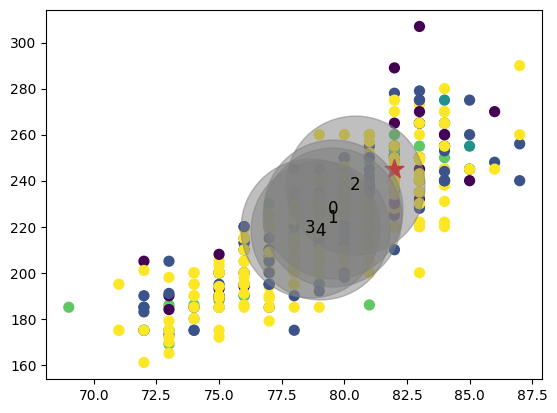

In [ ]:
XDn = ([5000000, 37, 82, 245, 45, 17.8, 0.5, 1.4, 0.4])  # Removed the extra '0'
XDn = np.array(XDn).reshape(1, -1)
ydn = mkm.predict(XDn)
print('El jugador pertenece al cluster::', mkm.predict(XDn))

# Assuming 'AboveAvg_PerCluster' and 'BelowAvg_PerCluster' are defined and accessible:
print('Probabilidad de Above Avg:', NApr.values[ydn][0][0]) # Correct way to index
print('Probabilidad de Below Avg:', NNeg.values[ydn][0][0]) # Correct way to index

XD = np.array(XD)
plt.scatter(XD[:, 2], XD[:, 3], c=labels, s=50, cmap='viridis')
plt.scatter(XDn[:, 2], XDn[:, 3], marker='*', s=200, facecolors='red')
plt.scatter(centroids[:, 2], centroids[:, 3], marker='*', s=200, facecolors='yellow')
plt.scatter(centroids[:, 2], centroids[:, 3], alpha=0.5, marker='o', s=10000, facecolors='grey')

for i, c in enumerate(centroids):
    plt.text(c[2], c[3], str(i), fontsize=12, color='black', ha='center', va='center')


**Análisis de resultados:**

El modelo de K-Means obtuvo una exactitud del 71.69%, lo que indica un desempeño moderado en la clasificación. Sin embargo, su sensibilidad del 48.42% sugiere que tiene dificultades para identificar correctamente a los jugadores con más partidos jugados que el promedio. En contraste, su especificidad del 89.02% demuestra que clasifica de manera más efectiva a los jugadores con menos partidos jugados. La precisión del 76.67% indica que, cuando el modelo predice que un jugador ha jugado más del promedio, suele estar en lo correcto. No obstante, con una tasa de error del 28.31%, aún hay margen de mejora. Para optimizar su rendimiento, se podrían ajustar los centroides o explorar métodos de clustering más avanzados.

# **Análisis de Desempeño de Modelos**

Se evaluaron tres modelos de clasificación (K-Means, Árboles de Decisión y Naïve Bayes) para predecir si un jugador de la NBA jugó por encima del promedio, considerando variables como salario, edad, juegos iniciados, minutos por partido, asistencias, bloqueos y robos.

* K-Means obtuvo una exactitud del 71.69%, pero con una baja sensibilidad (48.42%), lo que indica que tiene dificultades para identificar correctamente a los jugadores con más juegos jugados. Sin embargo, su especificidad (89.02%) muestra que clasifica bien a quienes juegan menos del promedio.
* Naive Bayes presentó un mejor desempeño, con una exactitud del 78.65% y una sensibilidad del 60%, lo que lo hace más confiable que K-Means para detectar a los jugadores con más partidos jugados. Su especificidad (92.54%) indica que también clasifica bien a los jugadores por debajo del promedio.
* Árboles de Decisión fue el modelo más preciso, con una exactitud del 95.5%, alta sensibilidad (93.68%) y especificidad (96.86%), clasificando correctamente tanto a los jugadores que juegan más como los que juegan menos del promedio.

Conclusión
El modelo de Árboles de Decisión es el más adecuado, ya que tiene el mejor desempeño general, con alta precisión y un balance óptimo entre detección y clasificación. Naive Bayes es una opción intermedia con buen rendimiento, pero menor sensibilidad. K-Means sigue siendo el menos efectivo debido a su dificultad para identificar correctamente a los jugadores con más juegos jugados. Para este problema, se recomienda el uso de Árboles de Decisión.